<a href="https://colab.research.google.com/github/rojaboina/Datathon/blob/main/Watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r"/content/National_Wild_and_Scenic_Rivers.csv")
data

,OBJECTID,WILDSCENICRIVERID,DESIGNATEDNAME,RIVER,AREAID,BOUNDARYSTATUS,GIS_ACRES,CLASSIFICATION,SHAPEAREA,SHAPELEN
0,178243,228369,"Allegheny, Pennsylvania National Wild and Scen...","Allegheny, Pennsylvania",133,Final,NaN,Recreational,0.015318,3.143132
1,178244,1574776010602,"Bautista Creek, California National Wild and S...","Bautista Creek, California",203,"Provisional, Subject to Change",NaN,Recreational,0.001269,0.330749
2,178245,228372,"Big Marsh Creek, Oregon National Wild and Scen...","Big Marsh Creek, Oregon",68,"Provisional, Subject to Change",NaN,Recreational,0.002128,0.481965
3,178246,228378,"Cache la Poudre, Colorado National Wild and Sc...","Cache la Poudre, Colorado",057,Final,NaN,Recreational,0.006371,1.568369
4,178247,228379,"Carp, Michigan National Wild and Scenic River","Carp, Michigan",121,Final,NaN,Recreational,0.000590,0.194458
...,...,...,...,...,...,...,...,...,...,...
256,178563,6215448010602,"Whitewater River, California National Wild and...","Whitewater River, California",230,"Provisional, Subject to Change",NaN,Wild,0.001966,0.574660
257,178564,228457,"Whychus Creek, Oregon National Wild and Scenic...","Whychus Creek, Oregon",102,"Provisional, Subject to Change",NaN,Wild,0.005350,0.530769
258,178565,228470,"Wilson Creek, North Carolina National Wild and...","Wilson Creek, North Carolina",161,"Provisional, Subject to Change",NaN,Wild,0.000570,0.147193
259,178566,228471,"Yellow Dog, Michigan National Wild and Scenic ...","Yellow Dog, Michigan",132,Final,NaN,Wild,0.000522,0.130416


# **Analysis on Watershed Data**

### 1. River Classification

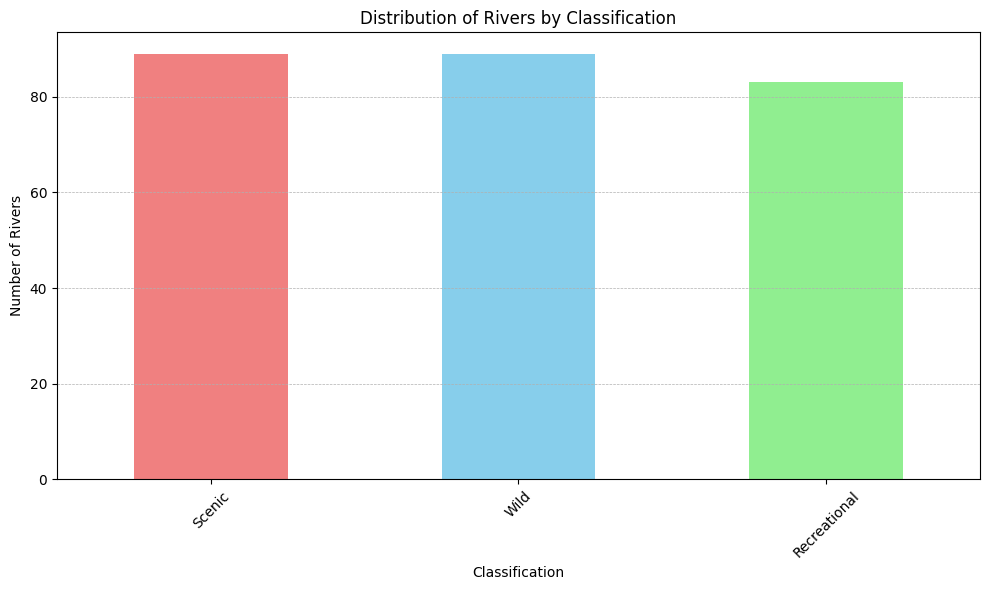

In [ ]:
from pandas.core.internals.construction import dataclasses_to_dicts

plt.figure(figsize=(10, 6))
classification_counts = data['CLASSIFICATION'].value_counts()

classification_counts.plot(kind='bar', color=['lightcoral', 'skyblue', 'lightgreen'])
plt.title("Distribution of Rivers by Classification")
plt.xlabel("Classification")
plt.ylabel("Number of Rivers")
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


## 2. Boundary Status Insights

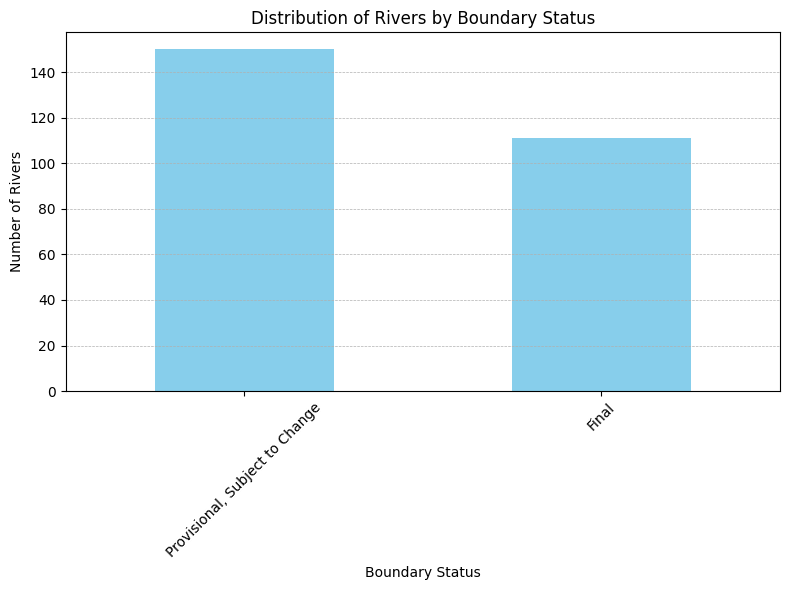

In [ ]:
plt.figure(figsize=(8, 6))
boundary_status_counts = data['BOUNDARYSTATUS'].value_counts()
boundary_status_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Rivers by Boundary Status")
plt.xlabel("Boundary Status")
plt.ylabel("Number of Rivers")
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


## 3. State Representation

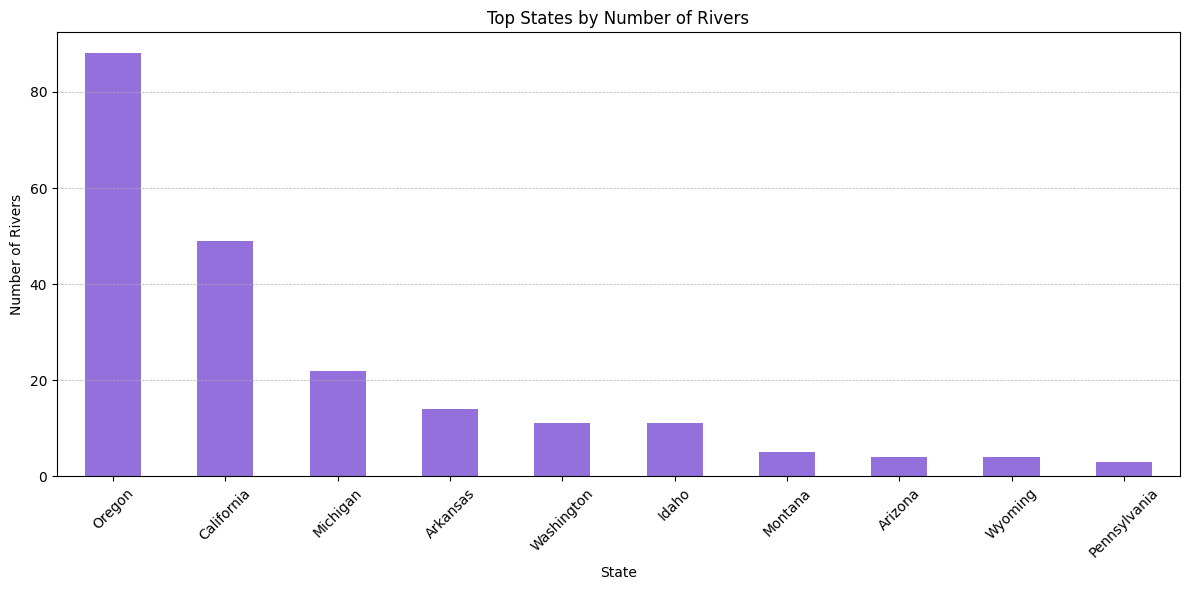

In [ ]:
plt.figure(figsize=(12, 6))
data['STATE'] = data['RIVER'].str.extract(r', (\w+)$')[0]
state_counts = data['STATE'].value_counts()
top_states = state_counts.head(10)

top_states.plot(kind='bar', color='mediumpurple')
plt.title('Top States by Number of Rivers')
plt.xlabel('State')
plt.ylabel('Number of Rivers')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

## 4. River Dimensions

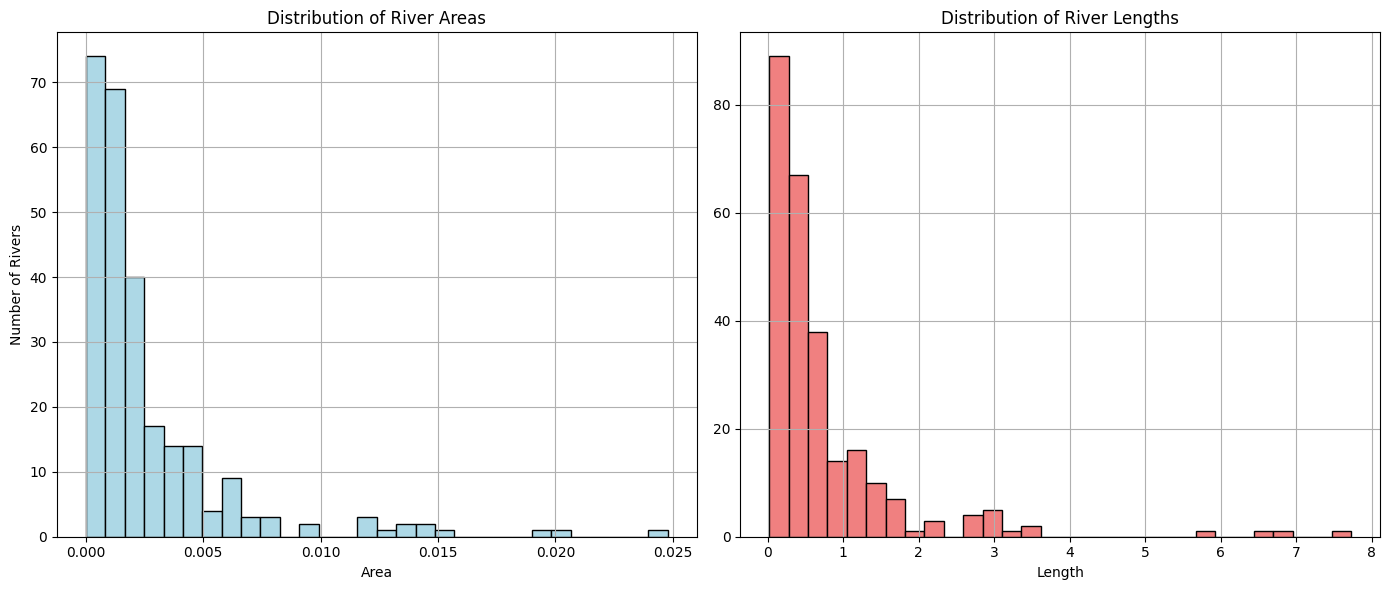

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for SHAPEAREA
data['SHAPEAREA'].hist(ax=ax1, bins=30, color='lightblue', edgecolor='black')
ax1.set_title('Distribution of River Areas')
ax1.set_xlabel('Area')
ax1.set_ylabel('Number of Rivers')

# Histogram for SHAPELEN
data['SHAPELEN'].hist(ax=ax2, bins=30, color='lightcoral', edgecolor='black')
ax2.set_title('Distribution of River Lengths')
ax2.set_xlabel('Length')

plt.tight_layout()

plt.show()


# Predicting Recreational Rivers

In [ ]:
# Preparing the data for predictive modeling

# Creating the target variable based on the "Recreational" classification
data['tourism_potential'] = data['CLASSIFICATION'].apply(lambda x: 1 if x == "Recreational" else 0)

# Selecting features for the model
features = ['SHAPEAREA', 'SHAPELEN']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X = data[features]
y = data['tourism_potential']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train a gradient boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

accuracy_gb, classification_rep_gb


(0.7169811320754716,
 '              precision    recall  f1-score   support\n\n           0       0.72      0.97      0.83        37\n           1       0.67      0.12      0.21        16\n\n    accuracy                           0.72        53\n   macro avg       0.69      0.55      0.52        53\nweighted avg       0.70      0.72      0.64        53\n')

Evaluating
Accuracy: The Gradient Boosting model has an accuracy of approximately
71.70
%
71.70%. This is an improvement over both the decision tree and the random forest models.

Classification Report:

Precision for Class 0 (Non-recreational):
72
%
72%
Of the rivers the model predicted as non-recreational,
72
%
72% were actually non-recreational.
Recall for Class 0 (Non-recreational):
97
%
97%
Of the actual non-recreational rivers in the test set, the model correctly identified
97
%
97% of them.
Precision for Class 1 (Recreational):
67
%
67%
Of the rivers the model predicted as recreational,
67
%
67% were actually recreational.
Recall for Class 1 (Recreational):
12
%
12%
Of the actual recreational rivers in the test set, the model correctly identified only
12
%
12% of them.
Observations:

The Gradient Boosting model demonstrates an improvement in precision for predicting recreational rivers compared to the previous models.
The recall for recreational rivers, while slightly better, is still relatively low, indicating challenges in predicting this class.